In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import matplotlib.dates as mdates
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import csv 
import cufflinks as cf
from plotly.offline import iplot

%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [38]:
df.isna().sum(axis=0)

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

### No missing values

In [3]:
# DATA PREPROCESS
df_process = df.copy()
df_process['class'].replace(['tested_positive', 'tested_negative'],
                        [1, 0], inplace=True)
df_process

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Answer 1

In [5]:
percent_positive = df_process['class'].mean()
percent_negative = 1 - percent_positive
print("Percent Positive " , percent_positive)
print("Percent Negative " , percent_negative)

Percent Positive  0.3489583333333333
Percent Negative  0.6510416666666667


In [6]:
# Answer 2

In [7]:
df_process.describe()['age']

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

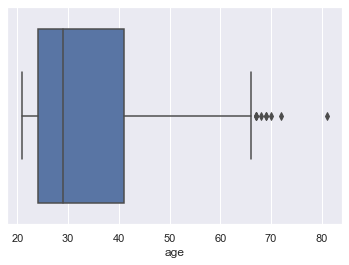

In [8]:
sns.set_theme(style="darkgrid")
sns.boxplot( x = 'age' , data=df_process)

<AxesSubplot:xlabel='age', ylabel='Count'>

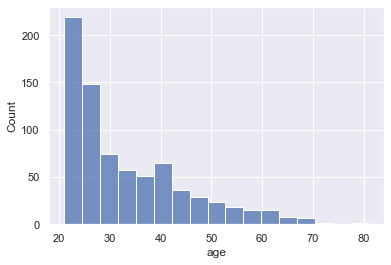

In [9]:
sns.histplot( x = 'age' , data = df_process)

In [10]:
# Answer 3

In [31]:
normal  = df[df.pres<80]['class']
at_risk = df[(df.pres>=80) & (df.pres<89)]['class']
high_blood = df[df.pres>=90]['class']
bp = {'Normal': normal.value_counts(), 'At Risk': at_risk.value_counts(),'High Blood':high_blood.value_counts()}  
bp = pd.DataFrame(bp)
bp

,Normal,At Risk,High Blood
tested_negative,385,84,31
tested_positive,178,61,29


<AxesSubplot:>

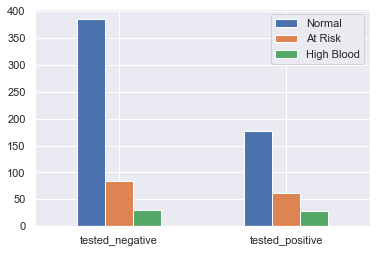

In [32]:
df_bp=pd.DataFrame(bp)
df_bp.plot.bar(rot=0)

In [12]:
# Answer 4

In [33]:
#underweight,normal, overweight or obese
underweight = df[df.mass < 18.5]['class']
normal = df[(df.mass >= 18.5) & (df.mass < 25)]['class']
overweight = df[(df.mass >= 25) & (df.mass < 30)]['class']
obese = df[df.mass >= 30]['class']
weight = {'underweight': underweight.value_counts(), 'normal': normal.value_counts(),'overweight':overweight.value_counts() ,'obese': obese.value_counts()}
weight = pd.DataFrame(l)
weight

,underweight,normal,overweight,obese
tested_negative,13,95,139,253
tested_positive,2,7,40,219


<AxesSubplot:>

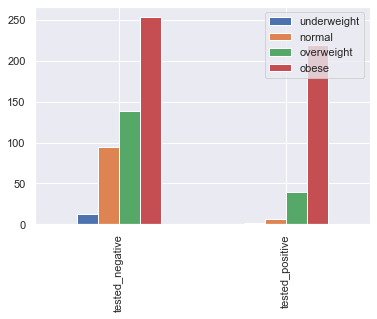

In [41]:
df_weight=pd.DataFrame(weight)
df_weight.plot.bar()

In [14]:
# Answer 5

In [15]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [16]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [17]:
corr, _ = spearmanr(df_process['class'],df_process['preg'])
print('Spearmans correlation between class and preg: %.4f' % corr)

Spearmans correlation between class and preg: 0.1987


In [18]:
corr, _ = spearmanr(df_process['class'],df_process['plas'])
print('Spearmans correlation between class and plas: %.4f' % corr)

Spearmans correlation between class and plas: 0.4758


In [19]:
corr, _ = spearmanr(df_process['class'],df_process['skin'])
print('Spearmans correlation between class and skin: %.4f' % corr)

Spearmans correlation between class and skin: 0.0897


In [20]:
corr, _ = spearmanr(df_process['class'],df_process['insu'])
print('Spearmans correlation between class and preg: %.4f' % corr)

Spearmans correlation between class and preg: 0.0665


In [21]:
corr, _ = spearmanr(df_process['class'],df_process['mass'])
print('Spearmans correlation between class and preg: %.4f' % corr)

Spearmans correlation between class and preg: 0.3097


In [22]:
corr, _ = spearmanr(df_process['class'],df_process['pedi'])
print('Spearmans correlation between class and preg: %.4f' % corr)

Spearmans correlation between class and preg: 0.1754


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop(['class'] , axis = 1)
y = df['class']
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, y)
len(fs.scores_)

8

In [28]:
scores_features_chi2 = pd.DataFrame()
scores_features_chi2['feature'] = df_process.columns.drop(['class'])
scores_features_chi2['scores'] = fs.scores_

In [45]:
scores_features_chi2.sort_values(by = 'scores' , ascending=False)

,feature,scores
4,insu,2175.565273
1,plas,1411.887041
7,age,181.303689
5,mass,127.669343
0,preg,111.519691
3,skin,53.108040
2,pres,17.605373
6,pedi,5.392682


In [46]:
## Higher Scores means more relevant
